In [ ]:
## NEED TO USED GADI JUPYTER - 4 nodes with 250gb mem total

In [1]:
## u_along figure

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np

import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
import glob
import os

In [2]:
import matplotlib.dates as mdates
import datetime
import pandas as pd

In [3]:
%matplotlib inline

In [4]:
from matplotlib import rc
rc('font', **{'size':25})
rc('text', usetex=False)
rc('xtick', labelsize=25) #20 
rc('ytick', labelsize=25) #20
rc('axes', titlesize=25)    # fontsize of the axes title
rc('axes', labelsize=25) #24    # fontsize of the x and y labels

In [5]:
session=cc.database.create_session()
expt = '01deg_jra55v13_ryf9091'

In [137]:
import dask.config
from dask.distributed import Client,LocalCluster
from dask_jobqueue import PBSCluster

c = Client()
c

<Client: 'tcp://127.0.0.1:38511' processes=7 threads=28, memory=125.19 GiB>

In [8]:
hu = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='hu', 
                          session=session, frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1).sel(yu_ocean = slice(-79,-60)).chunk({ 'yu_ocean':69, 'xu_ocean':360})
hu

<xarray.DataArray 'hu' (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
dask.array<rechunk-merge, shape=(440, 3600), dtype=float32, chunksize=(69, 360), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
    geolon_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
    geolat_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
Attributes:
    long_name:     ocean depth on u-cells
    units:         m
    valid_range:   [-1.e+09  1.e+09]
    cell_methods:  time: point
    ncfiles:       ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf909...
    contact:       Andy Hogg
    email:         andy.hogg@anu.edu.au
    created:       2020-06-11
    description:   0.1 degree ACCESS-OM2 global model configuration with JRA5...
    notes:         Additional daily outputs saved from 1 Jan 1950 to 31 Dec 1...
    url:           https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra55...

In [9]:
# location limits of dataset - choosing slice near totten
#lon_lim = slice(-270, -230) #slice(30, 45)#
lat_lim = slice(-79, -60) #slice(-70, -65)

hu_region = hu.sel( yu_ocean = lat_lim)

In [10]:

exp_ctrl= '01deg_jra55v13_ryf9091'
exp_wthmp= '01deg_jra55v13_ryf9091_qian_wthmp'
exp_wthp= '01deg_jra55v13_ryf9091_qian_wthp'
lat_lim = slice(-79, -60)
lon_lim = slice(-279.99,80)

#### SET EXPT HERE
expt = exp_wthmp


In [15]:
# We will use an annual average from 10 year in the RYF run
start_time_mw='2110-01-01 00:00:00' 
end_time_mw='2159-12-31 00:00:00'

flex_period = slice(start_time_mw, end_time_mw)

## making ualong decade average fields


In [16]:
u = cc.querying.getvar(expt=expt, variable='tx_trans_int_z', 
                          session=session).sel(time=flex_period).sel(yt_ocean = slice(-79,-60)).chunk({ 'yt_ocean':69, 'xu_ocean':360})

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3

In [17]:
v = cc.querying.getvar(expt=expt, variable='ty_trans_int_z', 
                          session=session).sel(yu_ocean = slice(-79,-60)).sel(time=flex_period).chunk({ 'yu_ocean':69, 'xt_ocean':360})

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3

In [18]:
mask_shelf = xr.where(hu<1000 , True, False)
mask_slope = xr.where(hu>1000, True, False)

In [20]:
## plotting everything together
cluster_mask_access = xr.open_mfdataset('Antarctic-Eddy-Res-Compare/largest_3cluster_mask_xr_accessom201.nc')
cluster_mask_access= cluster_mask_access.assign_coords(xu_ocean = ('xu_ocean', u.xu_ocean.data), yu_ocean = ('yu_ocean', v.yu_ocean.data))
#calculating area on shelf and slope total
area_u = cc.querying.getvar(expt='01deg_jra55v13_ryf9091', variable='area_u', 
                          session=session, frequency='static',
                          attrs={'cell_methods': 'time: point'}, n=1).sel(xu_ocean= lon_lim, yu_ocean = lat_lim)
circ_area_slope = (area_u*cluster_mask_access.where(mask_slope ==True)).sum().__xarray_dataarray_variable__.values                                                                                                                                                                                           
circ_area_shelf = (area_u*cluster_mask_access.where(mask_shelf ==True)).sum().__xarray_dataarray_variable__.values                                                                                                                                                                                           
circ_area_total = (area_u*cluster_mask_access).sum().__xarray_dataarray_variable__.values                                                                                                                                                                                           


In [103]:
cluster_mask_access

<xarray.Dataset> Size: 2MB
Dimensions:                        (yu_ocean: 440, xu_ocean: 3600)
Coordinates:
  * xu_ocean                       (xu_ocean) float64 29kB -279.9 ... 80.0
  * yu_ocean                       (yu_ocean) float64 4kB -78.98 ... -60.02
Data variables:
    __xarray_dataarray_variable__  (yu_ocean, xu_ocean) bool 2MB dask.array<chunksize=(440, 3600), meta=np.ndarray>

In [22]:
# defining B-grid using xgcm
path_to_folder = '/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091/output000/ocean/'
ocean_grid = xr.open_mfdataset(path_to_folder+'ocean_grid.nc', combine='by_coords')

In [23]:
# NEEDload coordinates and grid specifications
geolat_t = cc.querying.getvar(expt, 'geolat_t', session=session, n=1)
geolon_t = cc.querying.getvar(expt, 'geolon_t', session=session, n=1)

dxt = cc.querying.getvar(expt=expt, variable='dxt', session=session, frequency='static', n=1)
dyt = cc.querying.getvar(expt=expt, variable='dyt', session=session, frequency='static', n=1)

dxu = cc.querying.getvar(expt=expt, variable='dxu', session=session, frequency='static', n=1)
dyu = cc.querying.getvar(expt=expt, variable='dyu', session=session, frequency='static', n=1)

In [24]:
#sea_level_lim = sea_level.sel( xt_ocean= lon_lim, yt_ocean=lat_lim, time = flex_period)

# coordinates
lat_t = geolat_t.sel( xt_ocean= lon_lim,yt_ocean=lat_lim)
lon_t = geolon_t.sel(xt_ocean= lon_lim, yt_ocean=lat_lim)

dxt_lim = dxt.sel(xt_ocean= lon_lim,yt_ocean=lat_lim)
dyt_lim = dyt.sel(xt_ocean= lon_lim,yt_ocean=lat_lim)

dxu_lim = dxu.sel(xu_ocean= lon_lim,yu_ocean=lat_lim)
dyu_lim = dyu.sel(xu_ocean= lon_lim,yu_ocean=lat_lim)

In [25]:
## need to run seperately or it will crash
import xgcm
coordinates = xr.merge([dxt_lim, dyt_lim, dxu_lim, dyu_lim])

In [49]:
vel = xr.merge([hu,coordinates, u.isel(time = 0), v.isel(time = 0), ocean_grid.sel(xt_ocean= lon_lim,xu_ocean= lon_lim, yt_ocean=lat_lim, yu_ocean = lat_lim).isel(time = 0)],compat='override')# time is flex_period before

In [59]:
vel = vel.drop_vars('time')

In [60]:
vel.coords['xt_ocean'].attrs.update(axis='X')
vel.coords['xu_ocean'].attrs.update(axis='X', c_grid_axis_shift=0.5, periodic=True)
vel.coords['yt_ocean'].attrs.update(axis='Y')
vel.coords['yu_ocean'].attrs.update(axis='Y', c_grid_axis_shift=0.5)
metrics = {
    ('X',): ['dxt', 'dxu'], # X distances
    ('Y',): ['dyt', 'dyu'], # Y distances
    ('X', 'Y'): ['area_t', 'area_u'] # Areas
}

In [61]:
grid = xgcm.Grid(vel, periodic=['X'], metrics = metrics,boundary='extend')
grid

<xgcm.Grid>
X Axis (periodic, boundary='extend'):
  * center   xt_ocean --> right
  * right    xu_ocean --> center
Y Axis (not periodic, boundary='extend'):
  * center   yt_ocean --> right
  * right    yu_ocean --> center

In [129]:
vel

<xarray.Dataset> Size: 108MB
Dimensions:         (xu_ocean: 3600, yu_ocean: 440, xt_ocean: 3600,
                     yt_ocean: 440)
Coordinates:
  * xu_ocean        (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.9 80.0
  * yu_ocean        (yu_ocean) float64 4kB -78.98 -78.93 ... -60.07 -60.02
    geolon_c        (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
    geolat_c        (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
  * xt_ocean        (xt_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.85 79.95
  * yt_ocean        (yt_ocean) float64 4kB -79.0 -78.95 -78.91 ... -60.1 -60.05
    geolon_t        (yt_ocean, xt_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    geolat_t        (yt_ocean, xt_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
Data variables: (12/13)
    hu              (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
    dxt             (yt_ocean, xt_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    dyt             (yt_ocean, xt_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    dxu             (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    dyu             (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    tx_trans_int_z  (yt_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
    ...              ...
    ht              (yt_ocean, xt_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    area_t          (yt_ocean, xt_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    area_u          (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    kmt             (yt_ocean, xt_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    kmu             (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
    drag_coeff      (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(440, 900), meta=np.ndarray>
Attributes:
    long_name:     ocean depth on u-cells
    units:         m
    valid_range:   [-1.e+09  1.e+09]
    cell_methods:  time: point
    ncfiles:       ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf909...
    contact:       Andy Hogg
    email:         andy.hogg@anu.edu.au
    created:       2020-06-11
    description:   0.1 degree ACCESS-OM2 global model configuration with JRA5...
    notes:         Additional daily outputs saved from 1 Jan 1950 to 31 Dec 1...
    url:           https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra55...

In [52]:
# Take gradient and move to u grid
# Simple gradient over one grid cell. 
# In latitudinal direction, we need to specify what happens at the boundary.
dhu_dx = grid.interp( grid.diff(vel.hu, 'X') / grid.interp(vel.dxu, 'X'), 'X')#, 'Y', boundary='extend')
dhu_dy = grid.interp( grid.diff(vel.hu, 'Y', boundary='extend') / grid.interp(vel.dyt, 'X'), 'Y', boundary='extend')# 'X')
dhu_dx

<xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
dask.array<interp_center_to_right, shape=(440, 3600), dtype=float32, chunksize=(69, 360), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02

In [30]:
# Calculate the magnitude of the topographic slope
slope = np.sqrt(dhu_dx**2 + dhu_dy**2).rename('slope')

In [ ]:
## Calculation decadal means - splitting in x and then calculating time mean

In [138]:
def calc_trans_along_decademean(tt, chunk_size, u_input, v_input):
    
    u_t = grid.interp(u_input.isel(time = slice(tt*chunk_size, chunk_size*(tt+1))), axis = 'Y')#.where(cluster_mask_access == True)#.where(mask_region == True).load()
    v_t = grid.interp(v_input.isel(time = slice(tt*chunk_size, chunk_size*(tt+1))), axis = 'X')#.where(cluster_mask_access == True)#.where(mask_region == True).load()
    
    u_comp = (u_t*dhu_dy/slope)#.__xarray_dataarray_variable__#.compute()
    v_comp = (v_t*dhu_dx/slope)#.__xarray_dataarray_variable__#.compute()
    u_along = u_comp.chunk({ 'yu_ocean':100, 'xu_ocean':50}) - v_comp.chunk({ 'yu_ocean':100, 'xu_ocean':50})
    u_along_tt = u_along.mean(dim = 'time').load()#.values
    print(tt)
    return u_along_tt

In [139]:
ualong_x_tmean = []
## array of decades with ualong mean
chunk_size = 3600
for tt in range(4,5): # total 5 decades
    ualong_x_elem = calc_trans_along_decademean(tt, 120, u,v)
    ualong_x_tmean.append(ualong_x_elem)
                                            

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
 

4


In [140]:
ualong_x_tmean

[<xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
 array([[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [ 4.7736344e+07,  4.9749796e+07,  4.2685164e+07, ...,
          1.4624912e+08,  7.5159168e+07,  5.2456076e+07],
        [-1.9288184e+07,  3.3691028e+07,  5.5414668e+07, ...,
          2.0716885e+08,  1.1608752e+08,  7.3207992e+07],
        [-3.0853338e+07,  2.8818844e+07,  5.7904680e+07, ...,
          2.5150885e+08,  1.3991926e+08,  8.9884528e+07]], dtype=float32)
 Coordinates:
   * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
   * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02]

In [141]:
#ualong_decademean = xr.merge([ualong_x_tmean[i].assign_coords({'decade': 4}).expand_dims('decade')\
#                              for i in range(len(ualong_x_tmean))])
ualong_decademean = ualong_x_tmean[0]#.assign_coords({'decade': 4}).expand_dims('decade')
                              
ualong_decademean = ualong_decademean#.rename_vars({'__xarray_dataarray_variable__':'trans_along'})
ualong_decademean = (ualong_decademean/1035e6)#.assign_attrs(
#    units="Sv", description= 'Time-mean along slope velocity for each decade of MW expriment: ' + expt )
ualong_decademean

<xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 0.04612207,  0.04806744,  0.04124171, ...,  0.1413035 ,
         0.07261755,  0.0506822 ],
       [-0.01863593,  0.03255172,  0.05354074, ...,  0.20016314,
         0.11216185,  0.07073236],
       [-0.02980999,  0.02784429,  0.05594655, ...,  0.24300371,
         0.1351877 ,  0.08684495]], dtype=float32)
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02

In [145]:
ualong_decademean_wthmp = ualong_decademean#.plot()

In [146]:
u_wthp = cc.querying.getvar(expt=exp_wthp, variable='tx_trans_int_z', 
                          session=session).sel(time=flex_period).sel(yt_ocean = slice(-79,-60)).chunk({ 'yt_ocean':69, 'xu_ocean':360})

v_wthp = cc.querying.getvar(expt=exp_wthp, variable='ty_trans_int_z', 
                          session=session).sel(yu_ocean = slice(-79,-60)).sel(time=flex_period).chunk({ 'yu_ocean':69, 'xt_ocean':360})
ualong_x_tmean = []
## array of decades with ualong mean
chunk_size = 3600
for tt in range(4,5): # total 5 decades
    ualong_x_elem = calc_trans_along_decademean(tt, 120, u_wthp,v_wthp)
    ualong_x_tmean.append(ualong_x_elem)
ualong_decademean = ualong_x_tmean[0]#.assign_coords({'decade': 4}).expand_dims('decade')
ualong_decademean_wthp = (ualong_decademean/1035e6)                          

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3

4


In [147]:
u_ctrl= cc.querying.getvar(expt=exp_ctrl, variable='tx_trans_int_z', 
                          session=session).sel(time=flex_period).sel(yt_ocean = slice(-79,-60)).chunk({ 'yt_ocean':69, 'xu_ocean':360})

v_ctrl = cc.querying.getvar(expt=exp_ctrl, variable='ty_trans_int_z', 
                          session=session).sel(yu_ocean = slice(-79,-60)).sel(time=flex_period).chunk({ 'yu_ocean':69, 'xt_ocean':360})
ualong_x_tmean = []
## array of decades with ualong mean
chunk_size = 3600
for tt in range(4,5): # total 5 decades
    ualong_x_elem = calc_trans_along_decademean(tt, 120, u_ctrl,v_ctrl)
    ualong_x_tmean.append(ualong_x_elem)
ualong_decademean = ualong_x_tmean[0]#.assign_coords({'decade': 4}).expand_dims('decade')
ualong_decademean_ctrl = (ualong_decademean/1035e6)                          

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3.10/site-packages/xarray/core/dataset.py:271: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.01/lib/python3

4


In [148]:
cd Antarctic-Eddy-Res-Compare

/home/561/qo9901/Antarctic-Eddy-Res-Compare


In [149]:
import cmocean
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [150]:
## importing masks for clusters

cluster_mask_access = xr.open_mfdataset('largest_3cluster_mask_xr_accessom201.nc')
cluster_mask_access= cluster_mask_access.assign_coords(xu_ocean = ('xu_ocean', hu.xu_ocean.data), yu_ocean = ('yu_ocean', hu.yu_ocean.data)).__xarray_dataarray_variable__


In [151]:
hu_region*cluster_mask_access

<xarray.DataArray (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
dask.array<mul, shape=(440, 3600), dtype=float32, chunksize=(69, 360), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -78.98 -78.93 -78.89 ... -60.07 -60.02
    geolon_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
    geolat_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>

In [152]:
mask_bath_slopeshelf = xr.where((hu_region <2600),True,False)

In [153]:
land_mask = np.squeeze(hu.values)
land_mask = land_mask * 0
land_mask[np.isnan(land_mask)] = 1
yu_ocean = hu.yu_ocean.values
xu_ocean = hu.xu_ocean.values
land_mask_masked = np.ma.masked_where((land_mask==0),land_mask)
# make land go all the way to -90S:
land_mask_lat = hu.yu_ocean.values
land_mask_lat[0] = -80


In [180]:
levels_ualong = np.arange(-0.1,0.11,0.01)
levels_ualong = np.arange(-0.3,0.31,0.01)


In [155]:
def changeline_cs(linestyle):
    cs.monochrome = True
    for col,  ls in zip(cs.collections,cs._process_linestyles(linestyle)):
        col.set_linestyle(ls)
        col.set_edgecolor('k')
        #col.set_linewidth(2)


In [156]:
hu_region = hu_region#.where(cluster_mask_access == True)
hu_region

<xarray.DataArray 'hu' (yu_ocean: 440, xu_ocean: 3600)> Size: 6MB
dask.array<rechunk-merge, shape=(440, 3600), dtype=float32, chunksize=(69, 360), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 29kB -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yu_ocean  (yu_ocean) float64 4kB -80.0 -78.93 -78.89 ... -60.07 -60.02
    geolon_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
    geolat_c  (yu_ocean, xu_ocean) float32 6MB dask.array<chunksize=(69, 360), meta=np.ndarray>
Attributes:
    long_name:     ocean depth on u-cells
    units:         m
    valid_range:   [-1.e+09  1.e+09]
    cell_methods:  time: point
    ncfiles:       ['/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf909...
    contact:       Andy Hogg
    email:         andy.hogg@anu.edu.au
    created:       2020-06-11
    description:   0.1 degree ACCESS-OM2 global model configuration with JRA5...
    notes:         Additional daily outputs saved from 1 Jan 1950 to 31 Dec 1...
    url:           https://github.com/COSIMA/01deg_jra55_ryf/tree/01deg_jra55...

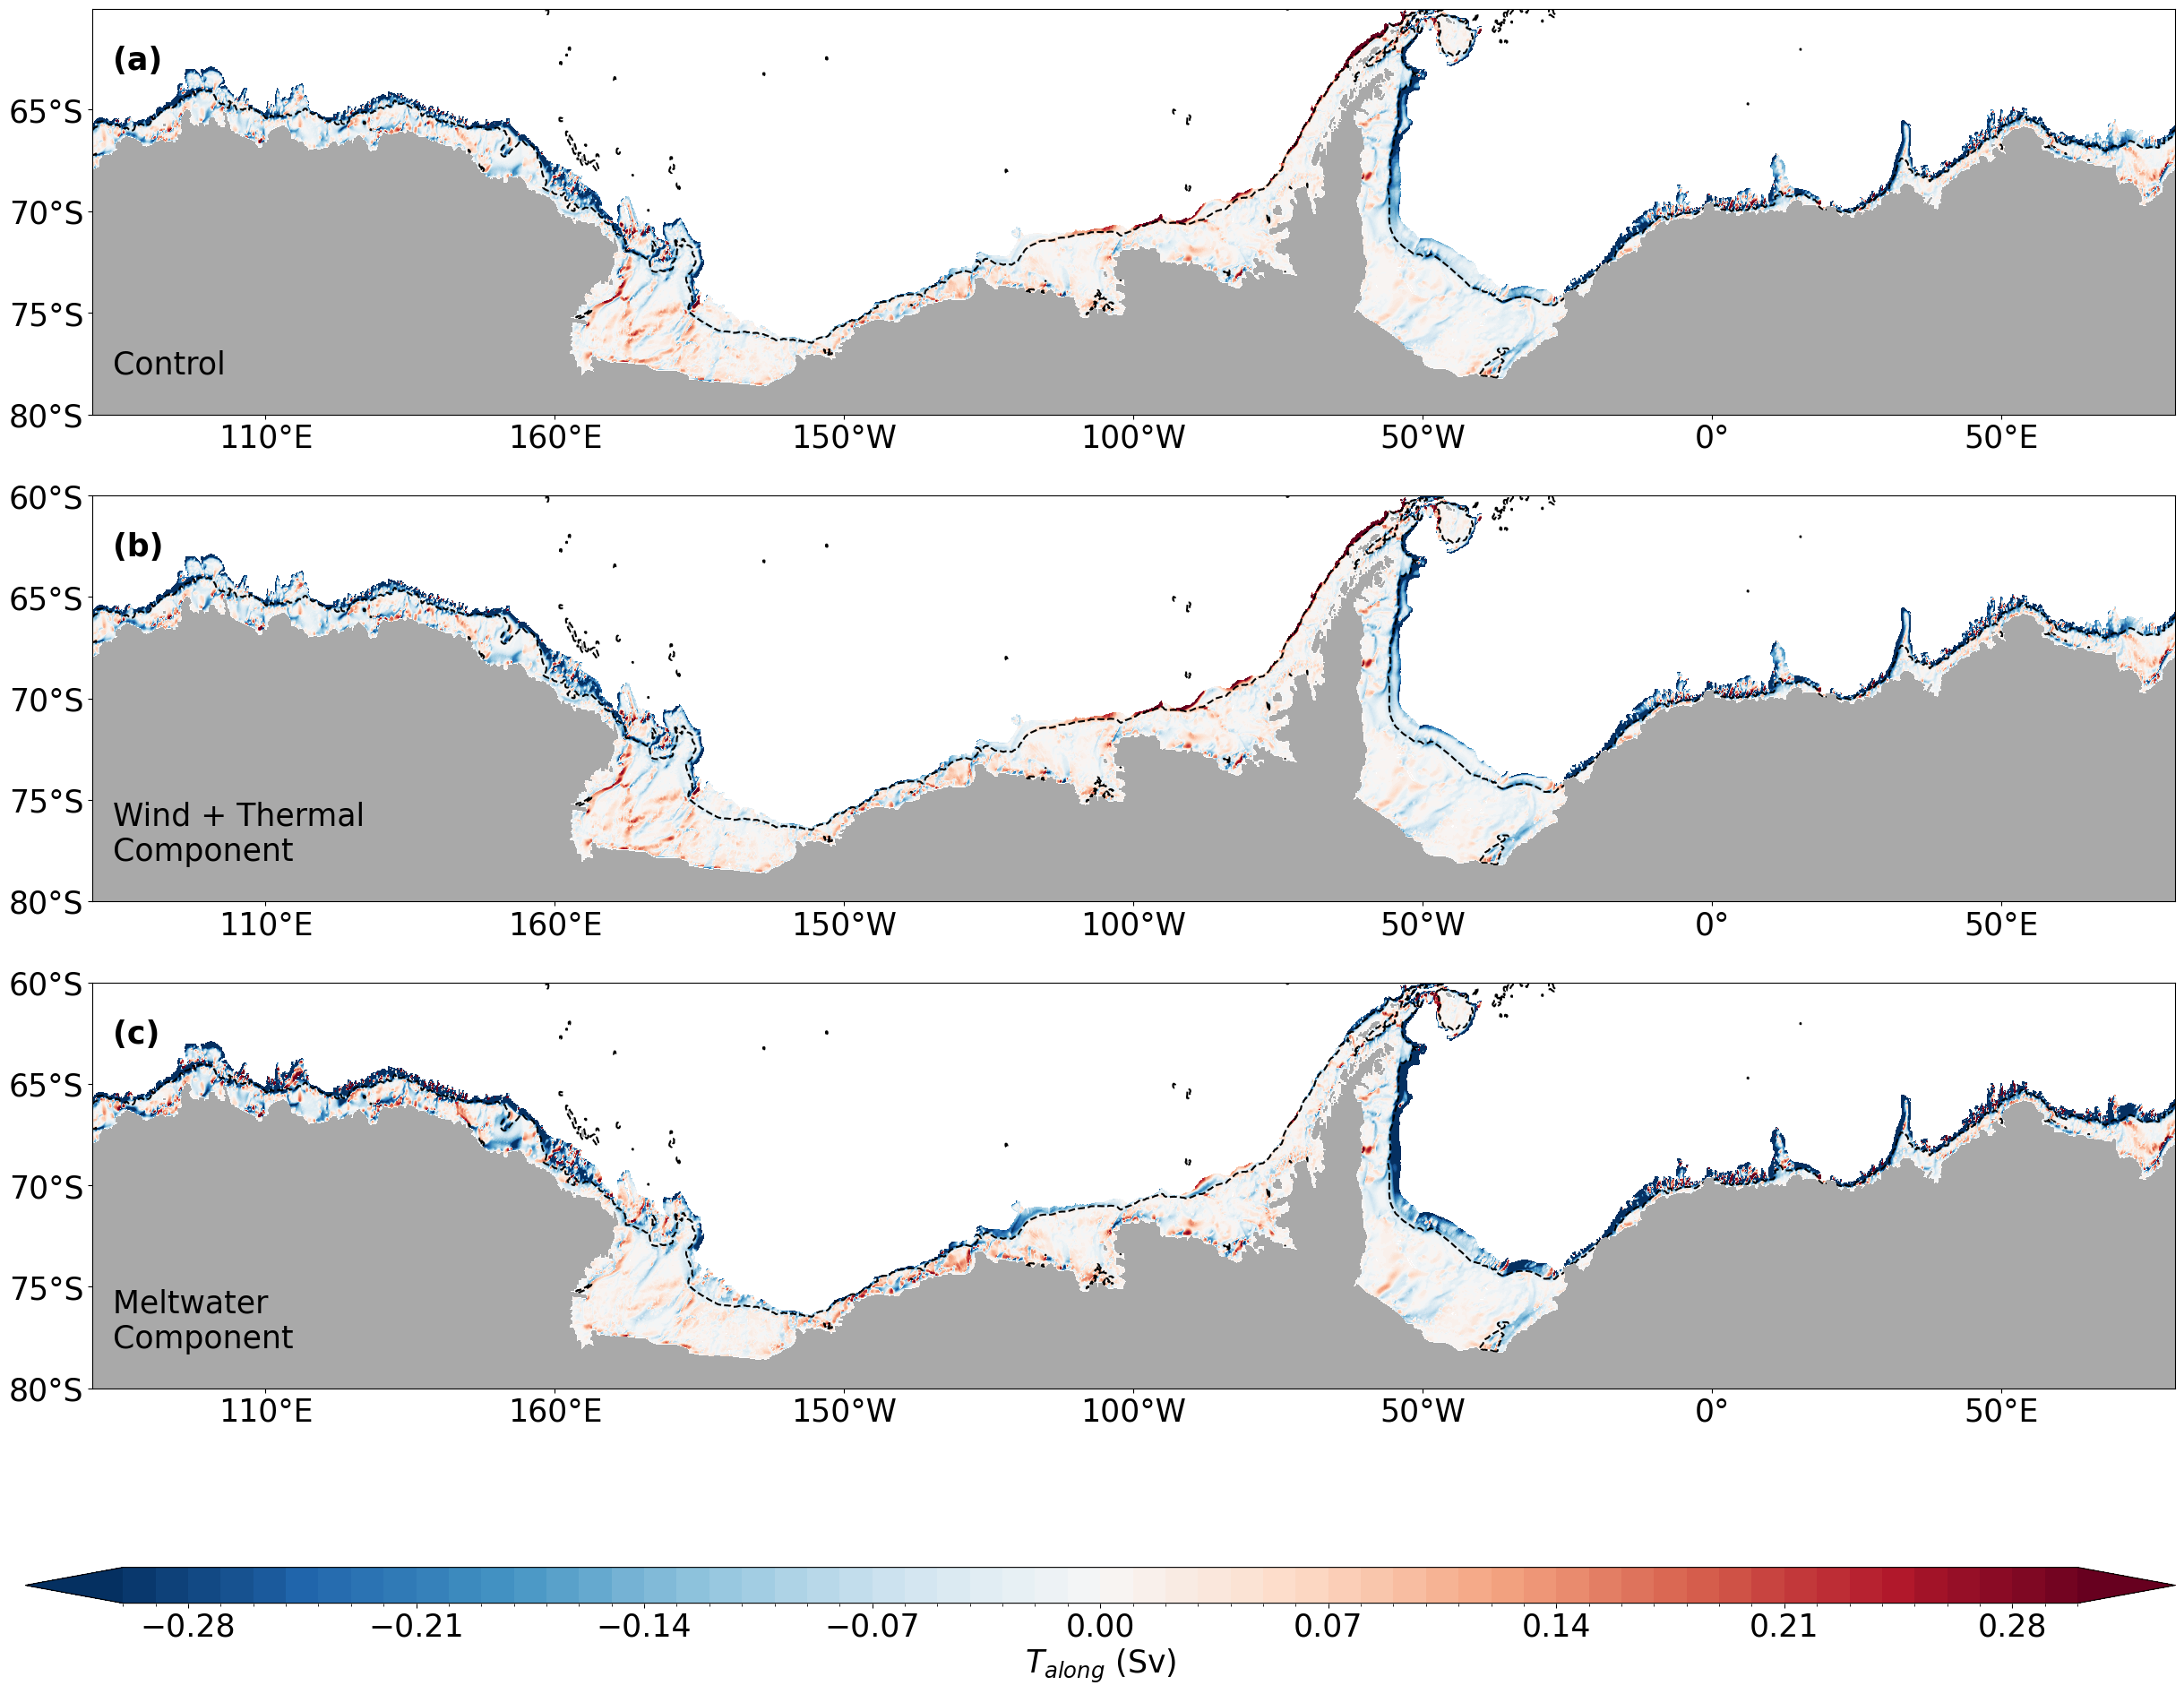

In [181]:
fig, ax = plt.subplots(nrows =3 ,figsize = (30,20))

# accessom2-01
cmap = ualong_decademean_ctrl.where(cluster_mask_access == True).plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax[0])
#cs = hu_region.where(hu_region < 2600).plot.contour(levels  = [2500], color = 'k', ax = ax[0])
#changeline_cs('solid')
cs = hu_region.plot.contour(levels  = [1000], color = 'k', ax = ax[0], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')
ax[0].set_ylabel('')
ax[0].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax[1].text(0.01,0.1,'Control',transform=ax[0].transAxes)
ax[0].set_xlabel('')
ax[0].text(0.01,0.85,'(a)', transform=ax[0].transAxes, fontweight = 'bold')



cmap = (ualong_decademean_wthp).where(cluster_mask_access == True).plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax[1])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark
cs = hu_region.plot.contour(levels  = [1000], color = 'k', ax = ax[1], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

ax[1].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax[1].set_ylim([-80,-60])
ax[1].text(0.01,0.1,'Wind + Thermal \nComponent',transform=ax[1].transAxes)
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].text(0.01,0.85,'(b)', transform=ax[1].transAxes, fontweight = 'bold')




cmap = (ualong_decademean_wthmp ).where(cluster_mask_access == True).plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax[2])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark
cs = hu_region.plot.contour(levels  = [1000], color = 'k', ax = ax[2], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

ax[2].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax[2].set_ylim([-80,-60])
ax[2].text(0.01,0.1,'Meltwater \nComponent',transform=ax[2].transAxes)
ax[2].set_ylabel('')
ax[2].set_xlabel('')
ax[2].text(0.01,0.85,'(c)', transform=ax[2].transAxes, fontweight = 'bold')

cb_ax = fig.add_axes([0.1, -0.01, 0.8, 0.02])
cbar = plt.colorbar(cmap, label = '$T_{along}$ (Sv)', orientation = 'horizontal', cax = cb_ax, pad = 0.01)
#cbar.set_ticks(np.arange(-0.1,0.125,0.025))

for box in range(3):
    ax[box].yaxis.set_major_formatter(LatitudeFormatter())
    ax[box].xaxis.set_major_formatter(LongitudeFormatter())


In [161]:
lat_slice_ross = slice(-80, -65)
lon_slice_ross = slice(-200, -150)
lat_slice_WA = slice(-77, -65) # -80
lon_slice_WA = slice(-130, -70)
lat_slice_WEA = slice(-75, -65) #-80
lon_slice_WEA = slice(-25, 40)
lat_slice_east = slice(-67, -63)
lon_slice_east = slice(-270, -230)

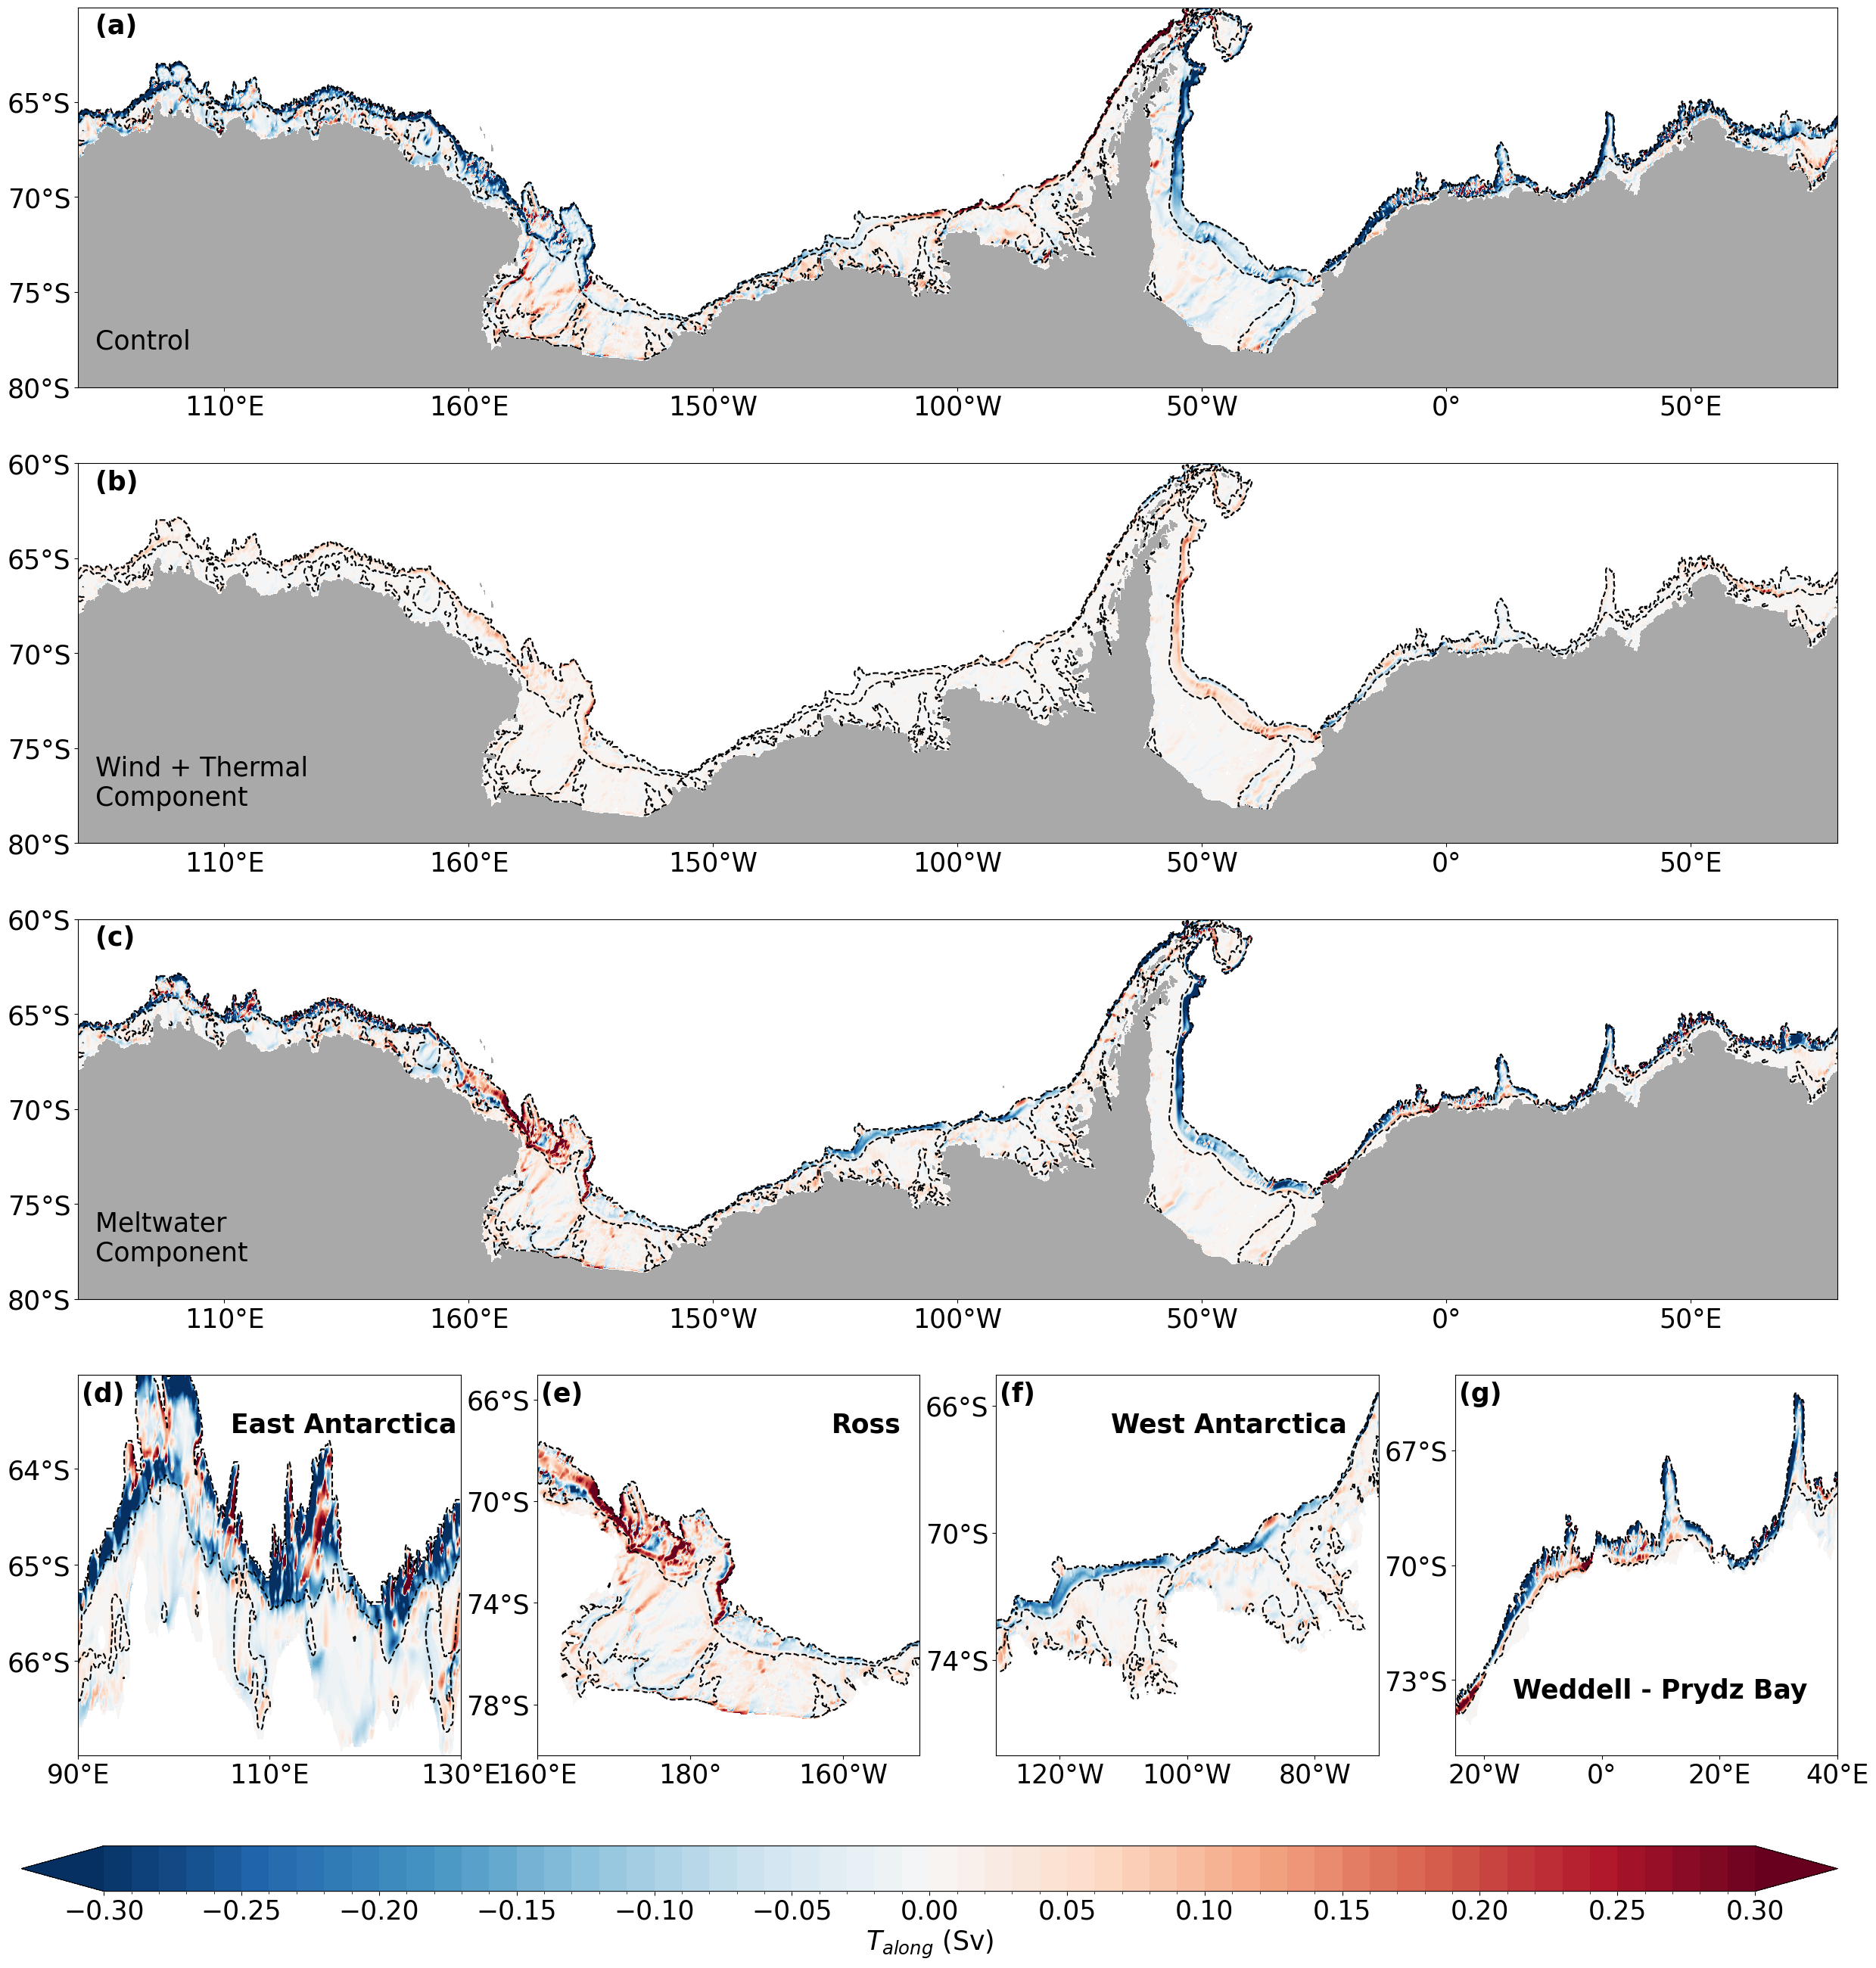

In [185]:
fig, ax = plt.subplot_mosaic("aaaa;bbbb;cccc;defg", figsize = (30,30))

# accessom2-01
cmap = ualong_decademean_ctrl.where(cluster_mask_access == True).plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax['a'])
#cs = (hu_region*cluster_mask_access).plot.contour(levels  = [2500], color = 'k', ax = ax['a'])
#changeline_cs('solid')
cs = (hu_region*cluster_mask_access).plot.contour(levels  = [600], color = 'g', ax = ax['a'], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')
ax['a'].set_ylabel('')
ax['a'].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax['a'].text(0.01,0.1,'Control',transform=ax['a'].transAxes)
ax['a'].set_xlabel('')

cmap = (ualong_decademean_wthp - ualong_decademean_ctrl).where(cluster_mask_access == True).plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax['b'])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark
cs = (hu_region*cluster_mask_access).plot.contour(levels  = [600], color = 'g', ax = ax['b'], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

ax['b'].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax['b'].set_ylim([-80,-60])
ax['b'].text(0.01,0.1,'Wind + Thermal \nComponent',transform=ax['b'].transAxes)
ax['b'].set_ylabel('')
ax['b'].set_xlabel('')

cmap = (ualong_decademean_wthmp - ualong_decademean_wthp).where(cluster_mask_access == True).plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax['c'])
#np.flip(deptho, 0).plot.contour(levels  = np.arange(0,4000,500), cmap = 'gray_r' , ax = ax[1]) # shallow is dark ' Greys deep is dark
cs = (hu_region*cluster_mask_access).plot.contour(levels  = [600], color = 'g', ax = ax['c'], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

ax['c'].contourf(hu.xu_ocean, land_mask_lat, land_mask_masked, colors='darkgrey', zorder=2)
ax['c'].set_ylim([-80,-60])
ax['c'].text(0.01,0.1,'Meltwater \nComponent',transform=ax['c'].transAxes)
ax['c'].set_ylabel('')
ax['c'].set_xlabel('')

### REGIONAL

cmap = (ualong_decademean_wthmp - ualong_decademean_wthp).where(cluster_mask_access == True).sel(xu_ocean = lon_slice_east, yu_ocean = lat_slice_east).plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax['d'])
cs = (hu_region*cluster_mask_access).sel(xu_ocean = lon_slice_east, yu_ocean = lat_slice_east).plot.contour(levels  = [600], color = 'g', ax = ax['d'], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

ax['d'].set_xticks([-270,-250, -230])
ax['d'].set_xlabel('')
ax['d'].set_ylabel('')
ax['d'].text(0.4,0.85,'East Antarctica', transform=ax['d'].transAxes, fontweight = 'bold')
#ax['E'].text(0.01,0.03,'(e)', transform=ax['E'].transAxes, fontweight = 'bold')


cmap = (ualong_decademean_wthmp - ualong_decademean_wthp).where(cluster_mask_access == True).sel(xu_ocean = lon_slice_ross, yu_ocean = lat_slice_ross).plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax['e'])
cs = (hu_region*cluster_mask_access).sel(xu_ocean = lon_slice_ross, yu_ocean = lat_slice_ross).plot.contour(levels  = [600], color = 'g', ax = ax['e'], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')
ax['e'].set_yticks([-78,-74,-70,-66])
ax['e'].set_xlabel('')
ax['e'].set_ylabel('')
ax['e'].text(0.77,0.85,'Ross', transform=ax['e'].transAxes, fontweight = 'bold')
#ax['F'].text(0.01,0.03,'(f)', transform=ax['F'].transAxes, fontweight = 'bold')


cmap = (ualong_decademean_wthmp - ualong_decademean_wthp).where(cluster_mask_access == True).sel(xu_ocean = lon_slice_WA, yu_ocean = lat_slice_WA).plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax['f'])
cs = (hu_region*cluster_mask_access).sel(xu_ocean = lon_slice_WA, yu_ocean = lat_slice_WA).plot.contour(levels  = [600], color = 'g', ax = ax['f'], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

ax['f'].set_yticks([-74,-70,-66])
ax['f'].set_xlabel('')
ax['f'].set_ylabel('')
ax['f'].text(0.3,0.85,'West Antarctica', transform=ax['f'].transAxes, fontweight = 'bold')
#ax['G'].text(0.01,0.03,'(g)', transform=ax['G'].transAxes, fontweight = 'bold')


cmap = (ualong_decademean_wthmp - ualong_decademean_wthp).where(cluster_mask_access == True).sel(xu_ocean = lon_slice_WEA, yu_ocean = lat_slice_WEA).plot.contourf(levels  = levels_ualong, add_colorbar = False, ax = ax['g'])
cs = (hu_region*cluster_mask_access).sel(xu_ocean = lon_slice_WEA, yu_ocean = lat_slice_WEA).plot.contour(levels  = [600], color = 'g', ax = ax['g'], linestyle = 'dashed') #conventional definition for ASC
changeline_cs('dashed')

    
ax['g'].set_xlabel('')
ax['g'].set_ylabel('')
ax['g'].set_yticks([-73,-70,-67])

ax['g'].text(0.15,0.15,'Weddell - Prydz Bay', transform=ax['g'].transAxes, fontweight = 'bold')

#fig.supxlabel('Longitude', y = 0.0725)

for letter in list(map(chr, range(ord('a'), ord('g')+1))):
    ax[letter].yaxis.set_major_formatter(LatitudeFormatter())
    ax[letter].xaxis.set_major_formatter(LongitudeFormatter())
    ax[letter].text(0.01,0.93,'(' + letter + ')', \
                transform=ax[letter].transAxes, fontweight = 'bold')

#plt.tight_layout()

cb_ax = fig.add_axes([0.1, 0.05, 0.8, 0.02]) #[0.1, -0.01, 0.8, 0.02])
cbar = plt.colorbar(cmap, label = '$T_{along}$ (Sv)', orientation = 'horizontal', cax = cb_ax)
cbar.set_ticks(np.arange(-0.3,0.35,0.05))

In [18]:
u_mean

<xarray.DataArray 'ug_s' (yu_ocean: 93, xu_ocean: 400)>
dask.array<mean_agg-aggregate, shape=(93, 400), dtype=float64, chunksize=(69, 60), chunktype=numpy.ndarray>
Coordinates:
  * xu_ocean  (xu_ocean) float64 -270.0 -269.9 -269.8 ... -230.3 -230.2 -230.1
  * yu_ocean  (yu_ocean) float64 -66.98 -66.94 -66.9 ... -63.11 -63.07 -63.02
    geolon_c  (yu_ocean, xu_ocean) float32 dask.array<chunksize=(69, 60), meta=np.ndarray>
    geolat_c  (yu_ocean, xu_ocean) float32 dask.array<chunksize=(69, 60), meta=np.ndarray>